# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [14]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
'''
通過 “nonlin” 函數體還能得到 sigmod 函數的導數（當形參 deriv 為 True 時）。
Sigmoid 函數優異特性之一，在於只用它的輸出值便可以得到其導數值。
若 Sigmoid 的輸出值用變數 out 表示，則其導數值可簡單通過式子 out *(1-out) 
'''
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))


'''
input dataset
輸入資料集初始化為 numpy 中的矩陣。每一行為一個“訓練實例”，
每一列的對應著一個輸入節點。這樣，我們的神經網路便有 3 個輸入節點，4 個訓練實例。
'''
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  


# define y for output dataset            
'''
輸出資料集進行初始化
.T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 行 1 列。
同我們的輸入一致，每一行是一個訓練實例，而每一列（僅有一列）對應一個輸出節點。
因此，我們的網路含有 3 個輸入， 1 個輸出
'''
y = np.array([[0,0,1,1]]).T


In [15]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,3)) - 1
# define syn1
syn1 = 2*np.random.random((3,1)) - 1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

# 記錄權重的變化
syn0_history = [syn0]
syn1_history = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [16]:
for iter in range(10000):
    # forward propagation
    l0 = X
    # (4 x 3) dot (3 x 3) = (4 x 3)
    l1 = nonlin(np.dot(l0,syn0))
    # (4 x 3) dot (3 x 1) = (4 x 1)
    l2 = nonlin(np.dot(l1,syn1))
    
    '''
    首先讓網路基於給定輸入“試著”去預測輸出。
    以至於作出一些調整，使得在每次反覆運算過程中網路能夠表現地更好一點。
    (4 x 3) dot (3 x 1) = (4 x 1)
    本行代碼包含兩個步驟。首先，將 l0 與 syn0 進行矩陣相乘。
    然後，將計算結果傳遞給 sigmoid 函數。具體考慮到各個矩陣的維度：
    (4 x 3) dot (3 x 1) = (4 x 1)
    '''
    
    #先計算 total error rate, 假設 Total_error = l1_error + l2_error
    Total_error = y - l2
    # l2_error 該值說明了神經網路預測時“丟失”的數目。導入 activation function 方式來計算 l2_error
    l2_error = np.power(Total_error, 2) / 2
    # l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    l2_delta = l2_error * nonlin(l2,True)
    
    # 計算 l1_error
    l1_error = Total_error - l2_error
    # multiply how much we missed by the slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    # syn1 update weights
    syn1 += np.dot(l1.T,l2_delta)

    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

Output After Training:
[[2.46743095e-04 2.46549566e-04 2.75200243e-04]
 [1.49008470e-04 1.48251491e-04 1.71214843e-04]
 [9.88575227e-01 9.88646285e-01 9.86607383e-01]
 [9.81220629e-01 9.81257484e-01 9.78645035e-01]]



[[0.50034277]
 [0.50020877]
 [0.9950548 ]
 [0.99485122]]


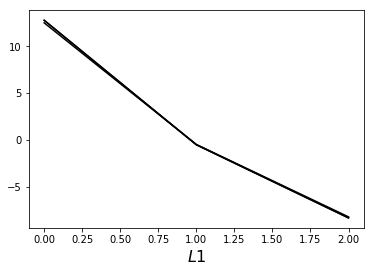

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

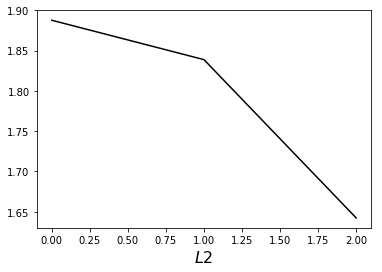

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()